In [1]:
from sklearn import tree
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import graphviz 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.metrics import classification_report


In [2]:
dataset = pd.read_csv(os.path.join("Data","heart_failure_clinical_records_dataset 2.csv"))
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
target = dataset["DEATH_EVENT"]
target_names = ["False", "True"]

In [4]:
data = dataset.drop("DEATH_EVENT", axis=1)
data_feature_names = data.columns
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [136]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=66)

In [137]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8

[Text(167.4, 181.2, 'time <= 67.5\ngini = 0.433\nsamples = 224\nvalue = [153, 71]\nclass = False'),
 Text(83.7, 108.72, 'creatinine_phosphokinase <= 110.0\ngini = 0.241\nsamples = 50\nvalue = [7, 43]\nclass = True'),
 Text(41.85, 36.23999999999998, '\n  (...)  \n'),
 Text(125.55000000000001, 36.23999999999998, '\n  (...)  \n'),
 Text(251.10000000000002, 108.72, 'serum_creatinine <= 1.55\ngini = 0.27\nsamples = 174\nvalue = [146, 28]\nclass = False'),
 Text(209.25, 36.23999999999998, '\n  (...)  \n'),
 Text(292.95, 36.23999999999998, '\n  (...)  \n')]

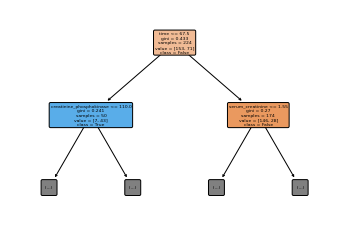

In [138]:
tree.plot_tree(clf, feature_names=data_feature_names, class_names=target_names,filled=True, rounded=True,max_depth=1)  

In [139]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train) 
rf.score(X_test, y_test)

0.8

In [140]:
sorted(zip(rf.feature_importances_, data_feature_names), reverse=True)

[(0.3077761711563156, 'time'),
 (0.16665771814959587, 'serum_creatinine'),
 (0.11802670417435479, 'ejection_fraction'),
 (0.10333598587584397, 'age'),
 (0.08687367686088045, 'creatinine_phosphokinase'),
 (0.07993567034142281, 'serum_sodium'),
 (0.07730391323666187, 'platelets'),
 (0.014401060064296272, 'anaemia'),
 (0.01223729312490418, 'smoking'),
 (0.011823991547702991, 'diabetes'),
 (0.011695227188450516, 'high_blood_pressure'),
 (0.009932588279570458, 'sex')]

In [141]:
classifier = LogisticRegression()
classifier
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8214285714285714
Testing Data Score: 0.8266666666666667


In [142]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
103,1,0
64,0,0
35,1,1
279,0,0
255,0,0
...,...,...
249,0,0
168,0,0
22,1,1
190,0,0


In [143]:
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)
print('Test Acc: %.3f' % svc_model.score(X_test, y_test))

Test Acc: 0.827


In [144]:
svc_predictions = svc_model.predict(X_test)
print(classification_report(y_test, svc_predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

       False       0.84      0.92      0.88        50
        True       0.80      0.64      0.71        25

    accuracy                           0.83        75
   macro avg       0.82      0.78      0.79        75
weighted avg       0.82      0.83      0.82        75



In [145]:
death_avg_time = dataset.groupby(["DEATH_EVENT"]).mean()['time']
death_avg_crea_serum = dataset.groupby(["DEATH_EVENT"]).mean()['serum_creatinine']
death_avg_eject = dataset.groupby(["DEATH_EVENT"]).mean()['ejection_fraction']
death_avg_age = dataset.groupby(["DEATH_EVENT"]).mean()['age']
death_avg_plat = dataset.groupby(["DEATH_EVENT"]).mean()['platelets']
death_avg_crea_phos = dataset.groupby(["DEATH_EVENT"]).mean()['creatinine_phosphokinase']
death_avg_sodium = dataset.groupby(["DEATH_EVENT"]).mean()['serum_sodium']
death_avg_anaemia = dataset.groupby(["DEATH_EVENT"]).mean()['anaemia']
death_avg_diabetes = dataset.groupby(["DEATH_EVENT"]).mean()['serum_sodium']
death_avg_pressure = dataset.groupby(["DEATH_EVENT"]).mean()['high_blood_pressure']
death_avg_sex = dataset.groupby(["DEATH_EVENT"]).mean()['sex']
death_avg_smoke = dataset.groupby(["DEATH_EVENT"]).mean()['smoking']

death_group_avgs = pd.DataFrame({"time_mean": death_avg_time, "serum_creatinine_mean": death_avg_crea_serum, "ejection_fraction_mean": death_avg_eject, 
                                 "age_mean": death_avg_age, "platelets_mean": death_avg_plat, "creatinine_phosphokinase_mean": death_avg_crea_phos,
                                "serum_sodium_mean": death_avg_sodium, "anaemia": death_avg_anaemia, "diabetes_mean": death_avg_diabetes, 
                                "high_blood_pressure_mean": death_avg_pressure, "sex_mean": death_avg_sex, "smoking_mean": death_avg_smoke})

death_group_avgs


,time_mean,serum_creatinine_mean,ejection_fraction_mean,age_mean,platelets_mean,creatinine_phosphokinase_mean,serum_sodium_mean,anaemia,diabetes_mean,high_blood_pressure_mean,sex_mean,smoking_mean
DEATH_EVENT,,,,,,,,,,,,
0,158.339901,1.184877,40.26601,58.761906,266657.489901,540.054187,137.216749,0.408867,137.216749,0.325123,0.650246,0.325123
1,70.885417,1.835833,33.46875,65.215281,256381.044792,670.197917,135.375000,0.479167,135.375000,0.406250,0.645833,0.312500


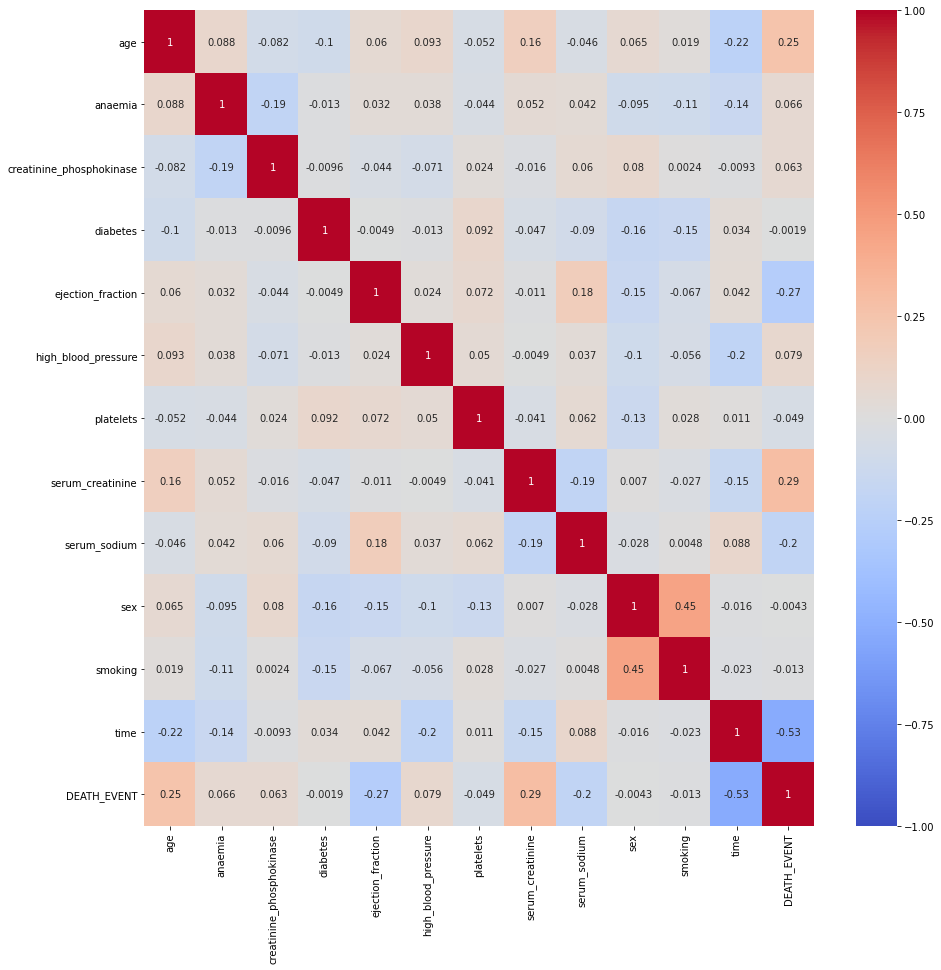

In [146]:
correlations = dataset.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [147]:
top_five_features = dataset[["age","ejection_fraction","serum_creatinine","serum_sodium","time"]]
top_five_feature_names = top_five_features.columns


In [148]:
X2_train, X2_test, y2_train, y2_test = train_test_split(top_five_features, target, random_state=66)

In [149]:
clf2 = tree.DecisionTreeClassifier()
clf2 = clf.fit(X2_train, y2_train)
clf2.score(X2_test, y2_test)
 

0.7733333333333333

[Text(167.4, 181.2, 'time <= 67.5\ngini = 0.433\nsamples = 224\nvalue = [153, 71]\nclass = False'),
 Text(83.7, 108.72, 'serum_sodium <= 136.5\ngini = 0.241\nsamples = 50\nvalue = [7, 43]\nclass = True'),
 Text(41.85, 36.23999999999998, '\n  (...)  \n'),
 Text(125.55000000000001, 36.23999999999998, '\n  (...)  \n'),
 Text(251.10000000000002, 108.72, 'serum_creatinine <= 1.55\ngini = 0.27\nsamples = 174\nvalue = [146, 28]\nclass = False'),
 Text(209.25, 36.23999999999998, '\n  (...)  \n'),
 Text(292.95, 36.23999999999998, '\n  (...)  \n')]

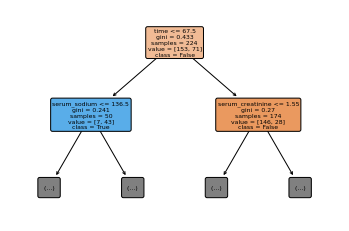

In [150]:
tree.plot_tree(clf2, feature_names=top_five_feature_names, class_names=target_names,filled=True, rounded=True,max_depth=1)  

In [151]:
rf2 = RandomForestClassifier(n_estimators=200)
rf2 = rf2.fit(X2_train, y2_train) 
rf2.score(X2_test, y2_test)

0.84

In [152]:
sorted(zip(rf2.feature_importances_, top_five_feature_names), reverse=True)

[(0.41895083488845003, 'time'),
 (0.216154868432009, 'serum_creatinine'),
 (0.13306019600314198, 'ejection_fraction'),
 (0.13203981708151427, 'age'),
 (0.09979428359488465, 'serum_sodium')]

In [153]:
classifier2 = LogisticRegression()
classifier2
classifier2.fit(X2_train, y2_train)
print(f"Training Data Score: {classifier2.score(X2_train, y2_train)}")
print(f"Testing Data Score: {classifier2.score(X2_test, y2_test)}")

Training Data Score: 0.84375
Testing Data Score: 0.8


In [154]:
predictions2 = classifier2.predict(X2_test)
pd.DataFrame({"Prediction": predictions2, "Actual": y2_test})

,Prediction,Actual
103,0,0
64,0,0
35,1,1
279,0,0
255,0,0
...,...,...
249,0,0
168,0,0
22,1,1
190,0,0


In [155]:
svc_model2 = SVC(kernel='linear')
svc_model2.fit(X2_train, y2_train)
print('Test Acc: %.3f' % svc_model2.score(X2_test, y2_test))

Test Acc: 0.813


In [156]:
svc_predictions2 = svc_model2.predict(X2_test)
print(classification_report(y2_test, svc_predictions2,
                            target_names=target_names))

              precision    recall  f1-score   support

       False       0.82      0.92      0.87        50
        True       0.79      0.60      0.68        25

    accuracy                           0.81        75
   macro avg       0.81      0.76      0.77        75
weighted avg       0.81      0.81      0.81        75



In [157]:
top_three_features = dataset[["age","serum_creatinine","time"]]
top_three_feature_names = top_three_features.columns

In [166]:
X3_train, X3_test, y3_train, y3_test = train_test_split(top_three_features, target, random_state=66)

In [167]:
clf3 = tree.DecisionTreeClassifier()
clf3 = clf3.fit(X3_train, y3_train)
clf3.score(X3_test, y3_test)

0.7466666666666667

[Text(167.4, 181.2, 'time <= 67.5\ngini = 0.433\nsamples = 224\nvalue = [153, 71]\nclass = False'),
 Text(83.7, 108.72, 'age <= 73.5\ngini = 0.241\nsamples = 50\nvalue = [7, 43]\nclass = True'),
 Text(41.85, 36.23999999999998, '\n  (...)  \n'),
 Text(125.55000000000001, 36.23999999999998, '\n  (...)  \n'),
 Text(251.10000000000002, 108.72, 'serum_creatinine <= 1.55\ngini = 0.27\nsamples = 174\nvalue = [146, 28]\nclass = False'),
 Text(209.25, 36.23999999999998, '\n  (...)  \n'),
 Text(292.95, 36.23999999999998, '\n  (...)  \n')]

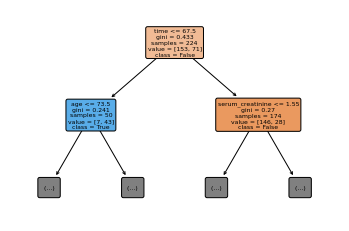

In [168]:
tree.plot_tree(clf3, feature_names=top_three_feature_names, class_names=target_names,filled=True, rounded=True,max_depth=1)  

In [169]:
rf3 = RandomForestClassifier(n_estimators=200)
rf3 = rf3.fit(X3_train, y3_train) 
rf3.score(X3_test, y3_test)

0.8

In [170]:
sorted(zip(rf3.feature_importances_, top_three_feature_names), reverse=True)

[(0.521228881319335, 'time'),
 (0.27382309147315875, 'serum_creatinine'),
 (0.2049480272075063, 'age')]

In [171]:
classifier3 = LogisticRegression()
classifier3
classifier3.fit(X3_train, y3_train)
print(f"Training Data Score: {classifier3.score(X3_train, y3_train)}")
print(f"Testing Data Score: {classifier3.score(X3_test, y3_test)}")

Training Data Score: 0.84375
Testing Data Score: 0.7866666666666666


In [172]:
predictions3 = classifier3.predict(X3_test)
pd.DataFrame({"Prediction": predictions3, "Actual": y3_test})

,Prediction,Actual
103,0,0
64,0,0
35,1,1
279,0,0
255,0,0
...,...,...
249,0,0
168,0,0
22,1,1
190,0,0


In [173]:
svc_model3 = SVC(kernel='linear')
svc_model3.fit(X3_train, y3_train)z
print('Test Acc: %.3f' % svc_model3.score(X3_test, y3_test))

Test Acc: 0.787


In [174]:
svc_predictions3 = svc_model3.predict(X3_test)
print(classification_report(y3_test, svc_predictions3,
                            target_names=target_names))

              precision    recall  f1-score   support

       False       0.78      0.94      0.85        50
        True       0.80      0.48      0.60        25

    accuracy                           0.79        75
   macro avg       0.79      0.71      0.73        75
weighted avg       0.79      0.79      0.77        75



In [175]:
top_forest_features = dataset[["age","ejection_fraction","serum_creatinine","creatinine_phosphokinase","time"]]
top_forest_feature_names = top_forest_features.columns

In [176]:
X4_train, X4_test, y4_train, y4_test = train_test_split(top_forest_features, target, random_state=66)

In [177]:
clf4 = tree.DecisionTreeClassifier()
clf4 = clf4.fit(X4_train, y4_train)
clf4.score(X4_test, y4_test)

0.7333333333333333

[Text(167.4, 181.2, 'time <= 67.5\ngini = 0.433\nsamples = 224\nvalue = [153, 71]\nclass = False'),
 Text(83.7, 108.72, 'creatinine_phosphokinase <= 110.0\ngini = 0.241\nsamples = 50\nvalue = [7, 43]\nclass = True'),
 Text(41.85, 36.23999999999998, '\n  (...)  \n'),
 Text(125.55000000000001, 36.23999999999998, '\n  (...)  \n'),
 Text(251.10000000000002, 108.72, 'serum_creatinine <= 1.55\ngini = 0.27\nsamples = 174\nvalue = [146, 28]\nclass = False'),
 Text(209.25, 36.23999999999998, '\n  (...)  \n'),
 Text(292.95, 36.23999999999998, '\n  (...)  \n')]

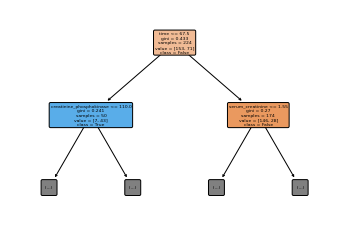

In [178]:
tree.plot_tree(clf4, feature_names=top_forest_feature_names, class_names=target_names,filled=True, rounded=True,max_depth=1)  

In [179]:
rf4 = RandomForestClassifier(n_estimators=200)
rf4 = rf4.fit(X4_train, y4_train) 
rf4.score(X4_test, y4_test)

0.76

In [180]:
sorted(zip(rf4.feature_importances_, top_forest_feature_names), reverse=True)

[(0.40886991263977207, 'time'),
 (0.21369003505989848, 'serum_creatinine'),
 (0.13918129710640423, 'creatinine_phosphokinase'),
 (0.12039479213820577, 'ejection_fraction'),
 (0.11786396305571939, 'age')]

In [181]:
classifier4 = LogisticRegression()
classifier4
classifier4.fit(X4_train, y4_train)
print(f"Training Data Score: {classifier4.score(X4_train, y4_train)}")
print(f"Testing Data Score: {classifier4.score(X4_test, y4_test)}")

Training Data Score: 0.84375
Testing Data Score: 0.7866666666666666


In [182]:
predictions4 = classifier4.predict(X4_test)
pd.DataFrame({"Prediction": predictions4, "Actual": y4_test})

,Prediction,Actual
103,1,0
64,0,0
35,1,1
279,0,0
255,0,0
...,...,...
249,0,0
168,0,0
22,1,1
190,0,0


In [183]:
svc_model4 = SVC(kernel='linear')
svc_model4.fit(X4_train, y4_train)
print('Test Acc: %.3f' % svc_model4.score(X4_test, y4_test))

Test Acc: 0.787


In [184]:
svc_predictions4 = svc_model4.predict(X4_test)
print(classification_report(y4_test, svc_predictions4,
                            target_names=target_names))

              precision    recall  f1-score   support

       False       0.81      0.88      0.85        50
        True       0.71      0.60      0.65        25

    accuracy                           0.79        75
   macro avg       0.76      0.74      0.75        75
weighted avg       0.78      0.79      0.78        75



In [185]:
three_forest_features = dataset[["ejection_fraction","serum_creatinine","time"]]
three_forest_feature_names = three_forest_features.columns

In [186]:
X5_train, X5_test, y5_train, y5_test = train_test_split(three_forest_features, target, random_state=66)

In [187]:
clf5 = tree.DecisionTreeClassifier()
clf5 = clf5.fit(X5_train, y5_train)
clf5.score(X5_test, y5_test)

0.8133333333333334

[Text(167.4, 181.2, 'time <= 67.5\ngini = 0.433\nsamples = 224\nvalue = [153, 71]\nclass = False'),
 Text(83.7, 108.72, 'ejection_fraction <= 36.5\ngini = 0.241\nsamples = 50\nvalue = [7, 43]\nclass = True'),
 Text(41.85, 36.23999999999998, '\n  (...)  \n'),
 Text(125.55000000000001, 36.23999999999998, '\n  (...)  \n'),
 Text(251.10000000000002, 108.72, 'serum_creatinine <= 1.55\ngini = 0.27\nsamples = 174\nvalue = [146, 28]\nclass = False'),
 Text(209.25, 36.23999999999998, '\n  (...)  \n'),
 Text(292.95, 36.23999999999998, '\n  (...)  \n')]

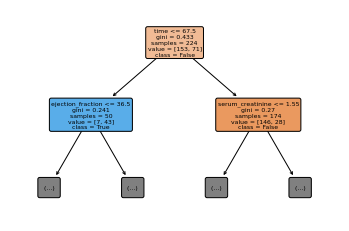

In [188]:
tree.plot_tree(clf5, feature_names=three_forest_feature_names, class_names=target_names,filled=True, rounded=True,max_depth=1)  

In [189]:
rf5 = RandomForestClassifier(n_estimators=200)
rf5 = rf5.fit(X5_train, y4_train) 
rf5.score(X5_test, y5_test)

0.8266666666666667

In [190]:
sorted(zip(rf5.feature_importances_, three_forest_feature_names), reverse=True)

[(0.5331032189346958, 'time'),
 (0.27724100996976414, 'serum_creatinine'),
 (0.18965577109554005, 'ejection_fraction')]

In [191]:
classifier5 = LogisticRegression()
classifier5
classifier5.fit(X5_train, y5_train)
print(f"Training Data Score: {classifier5.score(X5_train, y5_train)}")
print(f"Testing Data Score: {classifier5.score(X5_test, y5_test)}")

Training Data Score: 0.8348214285714286
Testing Data Score: 0.8


In [192]:
predictions5 = classifier5.predict(X5_test)
pd.DataFrame({"Prediction": predictions5, "Actual": y5_test})

,Prediction,Actual
103,0,0
64,0,0
35,1,1
279,0,0
255,0,0
...,...,...
249,0,0
168,0,0
22,1,1
190,0,0


In [193]:
svc_model5 = SVC(kernel='linear')
svc_model5.fit(X5_train, y5_train)
print('Test Acc: %.3f' % svc_model5.score(X5_test, y5_test))

Test Acc: 0.800
